In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from matplotlib import rc
rc('font', family = "AppleGothic")


In [2]:
response = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180525').text

In [3]:
soup = BeautifulSoup(response, 'html.parser')

In [4]:
dates_100 = pd.date_range('20180126', periods=100,freq='D')

In [5]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}"

In [6]:
names = []
points = []
dates = []

for date in tqdm_notebook(dates_100):
    url_with_date = url.format(date.strftime("%Y%m%d"))
    html = requests.get(url_with_date).text
    soup = BeautifulSoup(html, 'html.parser')
    
    tmp_names = soup.find_all('div','tit5')     
    for name in tmp_names:
        names.append(name.find('a').string)
        dates.append(date.strftime("%Y%m%d"))


    tmp_points = soup.find_all('td','point')
    for point in tmp_points:
        points.append(point.string)
    
    
    
    
    
# a = soup.find_all('div','tit5')
# b = soup.find_all('td','point')


# name = [i.find('a').string for i in a]
# point = [i.string for i in b]

In [7]:
df = pd.DataFrame({"dates":dates, 'names':names, 'points':points})

In [8]:
df.to_csv("../data/03.naver_movie_crawling.csv",sep=',', encoding='utf8')

In [9]:
df

,dates,names,points
0,20180126,원더,9.40
1,20180126,위대한 쇼맨,9.39
2,20180126,아이 캔 스피크,9.34
3,20180126,1987,9.28
4,20180126,마지막 황제,9.22
5,20180126,킹 오브 프리즘 한국어판,9.22
6,20180126,러빙 빈센트,9.19
7,20180126,뽀로로 극장판 공룡섬 대모험,9.17
8,20180126,내 사랑,9.17
9,20180126,코코,9.16


In [10]:
df.points = df.points.astype(float).fillna(0.0)

In [11]:
df_pivot_names = pd.pivot_table(df,index=['names'], values=['points'], aggfunc=np.mean)

In [12]:
df_pivot_names.sort_values(by='points', ascending=False)

,points
names,
덕구,9.558621
당갈,9.555000
원더,9.401463
위대한 쇼맨,9.384400
사운드 오브 뮤직,9.370000
동주,9.350000
아이 캔 스피크,9.347368
"지금, 만나러 갑니다",9.330000
굿 윌 헌팅,9.330000


In [13]:
tmp = df.query('names == ["원더"]')

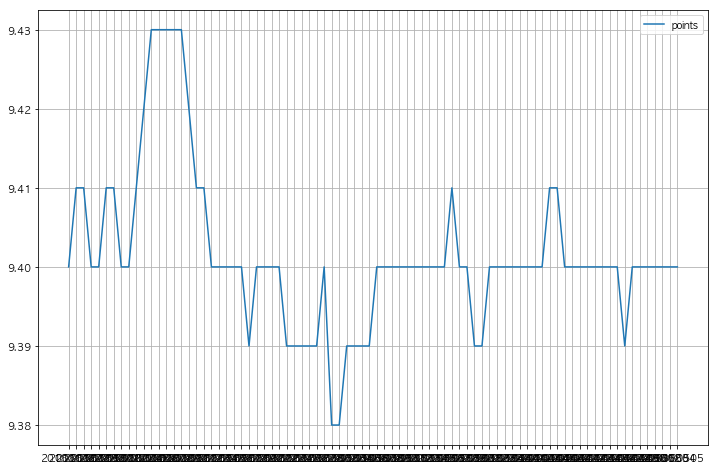

In [14]:
%matplotlib inline
plt.figure(figsize = (12,8))
plt.plot(tmp['dates'], tmp.points)
plt.grid()
plt.legend(loc = "best")
plt.show()

In [15]:
movie_pivot = pd.pivot_table(df, index=['dates'], columns=['names'], values=['points'])

In [16]:
movie_pivot.to_csv('../data/03.movie_pivot.csv',sep=',')

In [17]:
movie_pivot.head().fillna(0.00)

points                                                               \
names    12 솔져스 120BPM  1987  1급기밀   4등 50가지 그림자: 해방 7년의 밤 B급 며느리   강철비  게이트   
dates                                                                          
20180126    0.0    0.0  9.28  8.97  0.0          0.0   0.0    0.0  8.42  0.0   
20180127    0.0    0.0  9.28  8.96  0.0          0.0   0.0    0.0  8.41  0.0   
20180128    0.0    0.0  9.28  9.01  0.0          0.0   0.0    0.0  8.41  0.0   
20180129    0.0    0.0  9.28  8.97  0.0          0.0   0.0    0.0  8.40  0.0   
20180130    0.0    0.0  9.28  8.92  0.0          0.0   0.0    0.0  8.40  0.0   

              ...                                                      \
names         ...       펀치 드렁크 러브 페르디난드 프렌즈: 몬스터 섬의 비밀 플로리다 프로젝트   플립   
dates         ...                                                       
20180126      ...             0.0  8.91            0.0       0.0  0.0   
20180127      ...             0.0  8.91            0.0       0.0  0.0   
20180128      ...             0.0  8.92            0.0       0.0  0.0   
20180129      ...             0.0  8.92            0.0       0.0  0.0   
20180130      ...             0.0  8.92            0.0       0.0  0.0   

                                                                   
names    하이 스피드! –프리! 스타팅 데이즈 허리케인 하이스트 환상의 빛   흥부 흥부 글로 세상을 바꾼 자  
dates                                                              
20180126                  0.0       0.0   0.0  0.0            0.0  
20180127                  0.0       0.0   0.0  0.0            0.0  
20180128                  0.0       0.0   0.0  0.0            0.0  
20180129                  0.0       0.0   0.0  0.0            0.0  
20180130                  0.0       0.0   0.0  0.0            0.0  

[5 rows x 189 columns]

In [18]:
movie_pivot

points                                                           \
names    12 솔져스 120BPM  1987  1급기밀    4등 50가지 그림자: 해방 7년의 밤 B급 며느리   강철비   
dates                                                                      
20180126    NaN    NaN  9.28  8.97   NaN          NaN   NaN    NaN  8.42   
20180127    NaN    NaN  9.28  8.96   NaN          NaN   NaN    NaN  8.41   
20180128    NaN    NaN  9.28  9.01   NaN          NaN   NaN    NaN  8.41   
20180129    NaN    NaN  9.28  8.97   NaN          NaN   NaN    NaN  8.40   
20180130    NaN    NaN  9.28  8.92   NaN          NaN   NaN    NaN  8.40   
20180131    NaN    NaN  9.28  8.90   NaN          NaN   NaN    NaN  8.40   
20180201    NaN    NaN  9.28  8.90   NaN          NaN   NaN    NaN  8.40   
20180202    NaN    NaN  9.28  8.89   NaN          NaN   NaN    NaN  8.40   
20180203   8.92    NaN  9.28  8.89   NaN          NaN   NaN    NaN  8.40   
20180204   9.03    NaN  9.28  8.90   NaN          NaN   NaN    NaN  8.40   
20180205   9.06    NaN  9.28  8.91   NaN          NaN   NaN    NaN  8.40   
20180206   9.01    NaN  9.28  8.91   NaN          NaN   NaN    NaN  8.40   
20180207   8.94    NaN  9.28  8.90   NaN          NaN   NaN    NaN  8.39   
20180208   8.93    NaN  9.27  8.89   NaN          NaN   NaN    NaN  8.39   
20180209   8.92    NaN  9.27  8.89   NaN          NaN   NaN    NaN  8.39   
20180210   8.93    NaN  9.27  8.89   NaN          NaN   NaN    NaN  8.39   
20180211   8.88    NaN  9.27  8.89   NaN          NaN   NaN    NaN  8.39   
20180212   8.85    NaN  9.27  8.88   NaN          NaN   NaN    NaN  8.39   
20180213   8.85    NaN  9.27  8.86   NaN          NaN   NaN    NaN  8.39   
20180214   8.84    NaN  9.26  8.78   NaN          NaN   NaN    NaN   NaN   
20180215   8.84    NaN  9.26  8.75   NaN          NaN   NaN    NaN   NaN   
20180216   8.83    NaN  9.26  8.76   NaN          NaN   NaN    NaN   NaN   
20180217   8.83    NaN  9.26  8.77   NaN          NaN   NaN   8.52   NaN   
20180218   8.83    NaN  9.26  8.79   NaN          NaN   NaN   8.53   NaN   
20180219   8.84    NaN  9.26  8.81   NaN          NaN   NaN   8.56  8.38   
20180220   8.84    NaN  9.26  8.83   NaN          NaN   NaN   8.56  8.38   
20180221   8.84    NaN  9.26  8.82   NaN          NaN   NaN   8.54  8.38   
20180222   8.84    NaN  9.26  8.81   NaN          NaN   NaN   8.53  8.38   
20180223   8.84    NaN  9.26  8.81   NaN         8.27   NaN   8.52  8.38   
20180224   8.84    NaN  9.26  8.81   NaN         8.25   NaN   8.51  8.38   
...         ...    ...   ...   ...   ...          ...   ...    ...   ...   
20180406   8.83   2.62   NaN   NaN   NaN         8.08  6.05   8.47   NaN   
20180407   8.83   2.63   NaN   NaN   NaN         8.08  6.03   8.45   NaN   
20180408   8.83   2.63   NaN   NaN   NaN         8.08  5.99   8.43   NaN   
20180409   8.83   2.63   NaN   NaN   NaN         8.08  5.96   8.44   NaN   
20180410   8.82   2.64   NaN   NaN   NaN         8.08  5.96   8.44   NaN   
20180411   8.74   2.64   NaN   NaN   NaN          NaN  5.90   8.44   NaN   
20180412   8.68   2.64   NaN   NaN   NaN          NaN  5.76   8.43   NaN   
20180413   8.65   2.65   NaN   NaN   NaN          NaN  5.69   8.43   NaN   
20180414   8.60   2.65   NaN   NaN   NaN          NaN  5.62   8.43   NaN   
20180415   8.60   2.65   NaN   NaN   NaN          NaN  5.58   8.43   NaN   
20180416   8.58   2.65   NaN   NaN   NaN          NaN  5.56   8.43   NaN   
20180417   8.57    NaN   NaN   NaN   NaN          NaN   NaN   8.42   NaN   
20180418   8.53    NaN   NaN   NaN   NaN          NaN   NaN   8.43   NaN   
20180419   8.50    NaN   NaN   NaN   NaN          NaN   NaN   8.43   NaN   
20180420   8.51    NaN   NaN   NaN   NaN          NaN   NaN   8.43   NaN   
20180421   8.49    NaN   NaN   NaN   NaN          NaN   NaN   8.43   NaN   
20180422   8.47    NaN   NaN   NaN   NaN          NaN   NaN   8.43   NaN   
20180423   8.44   2.65   NaN   NaN   NaN          NaN  5.46   8.41   NaN   
20180424   8.41   2.66   NaN   NaN   NaN          NaN  5.

In [19]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [20]:
movie_pivot.columns


Index([12 솔져스, 120BPM, 1987, 1급기밀, 4등, 50가지 그림자: 해방, 7년의 밤, B급 며느리, 강철비, 게이트,
       ...
       펀치 드렁크 러브, 페르디난드, 프렌즈: 몬스터 섬의 비밀, 플로리다 프로젝트, 플립, 하이 스피드! –프리! 스타팅 데이즈,
       허리케인 하이스트, 환상의 빛, 흥부, 흥부 글로 세상을 바꾼 자],
      dtype='object', name='names', length=189)

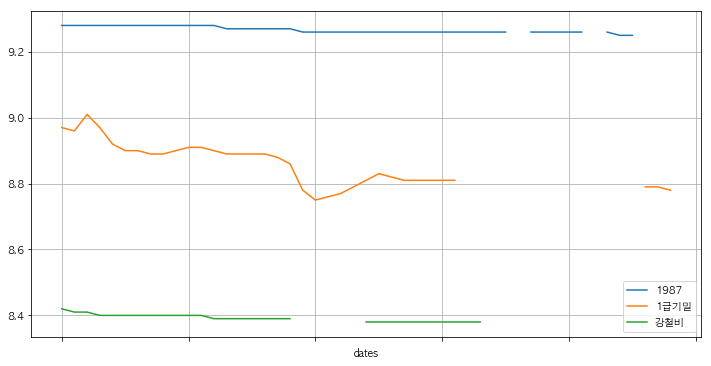

In [21]:
movie_pivot.plot(y = ['1987', '1급기밀', '강철비'], figsize=(12,6))
plt.grid()
plt.legend(loc = 'best')
plt.show()